In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder

---

In [2]:
train_df = pd.read_csv('data/original_train.csv')
test_df = pd.read_csv('data/original_test.csv')

In [3]:
df = pd.concat([train_df, test_df]).reset_index(drop=True)
df.shape

(1309, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


---

# 1. Exploratory Data Analysis

In [5]:
def show_survivors_by_column(column):
    sorted_column = sorted(df[column].astype(str).unique())
    plt.figure(figsize=(8,5))
    sns.countplot(df, x=column, hue='Survived', order=sorted_column)
    plt.title(f'Survivors by {column}')
    plt.ylabel('Survivors')
    plt.show()

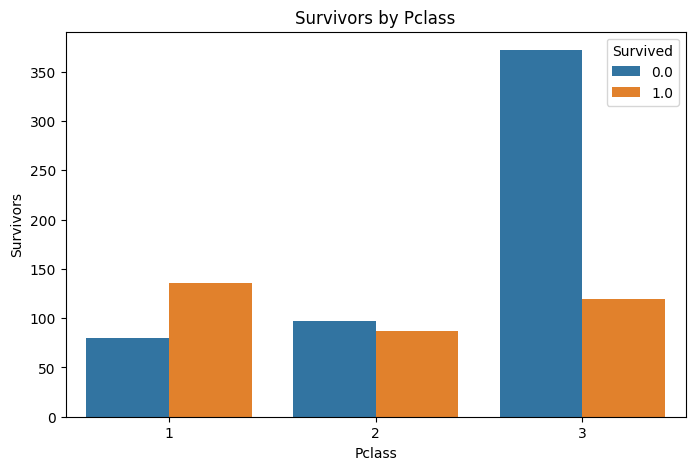

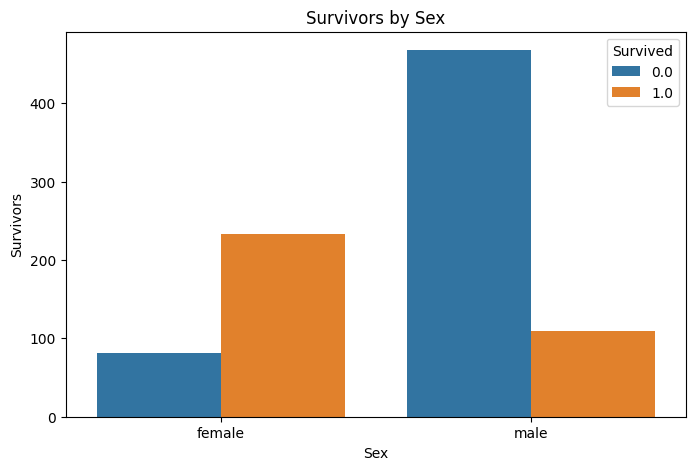

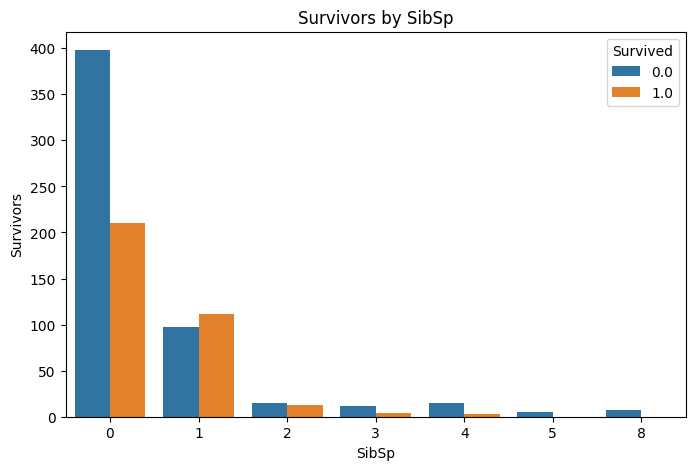

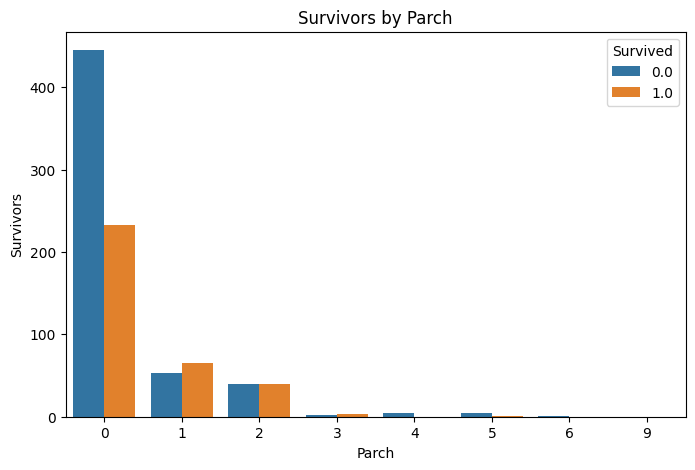

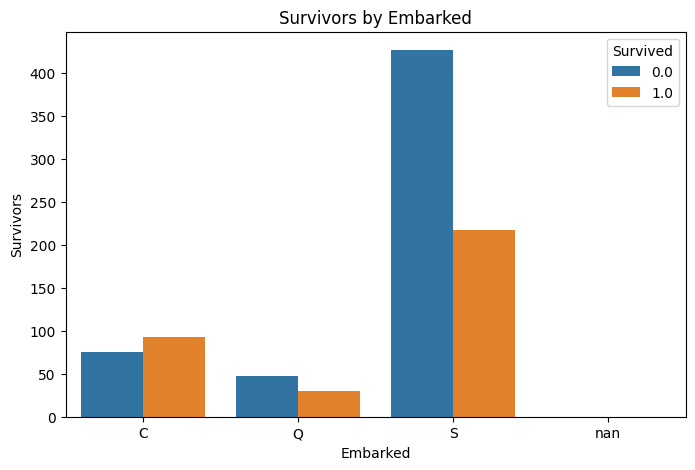

In [6]:
show_survivors_by_column('Pclass')
show_survivors_by_column('Sex')
show_survivors_by_column('SibSp')
show_survivors_by_column('Parch')
show_survivors_by_column('Embarked')

---

In [7]:
def show_survivors_by_age_fare(column):
    df_without_nan = df[df[column].notna()].copy()
    df_without_nan[column] = df_without_nan[column].astype(int)
    mean_value = round(df_without_nan[column].mean())

    plt.figure(figsize=(12,7))
    sns.countplot(df_without_nan.query(f"{column} <= {mean_value}"), x=column, hue='Survived')
    plt.title(f'Survivors by {column} <= {mean_value}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Survivors', fontsize=12)
    plt.xticks(rotation=60)
    plt.show()

    plt.figure(figsize=(12,7))
    sns.countplot(df_without_nan.query(f"{column} > {mean_value}"), x=column, hue='Survived')
    plt.title(f'Survivors by {column} > {mean_value}', fontsize=15)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Survivors', fontsize=12)
    plt.xticks(rotation=60)
    plt.show()

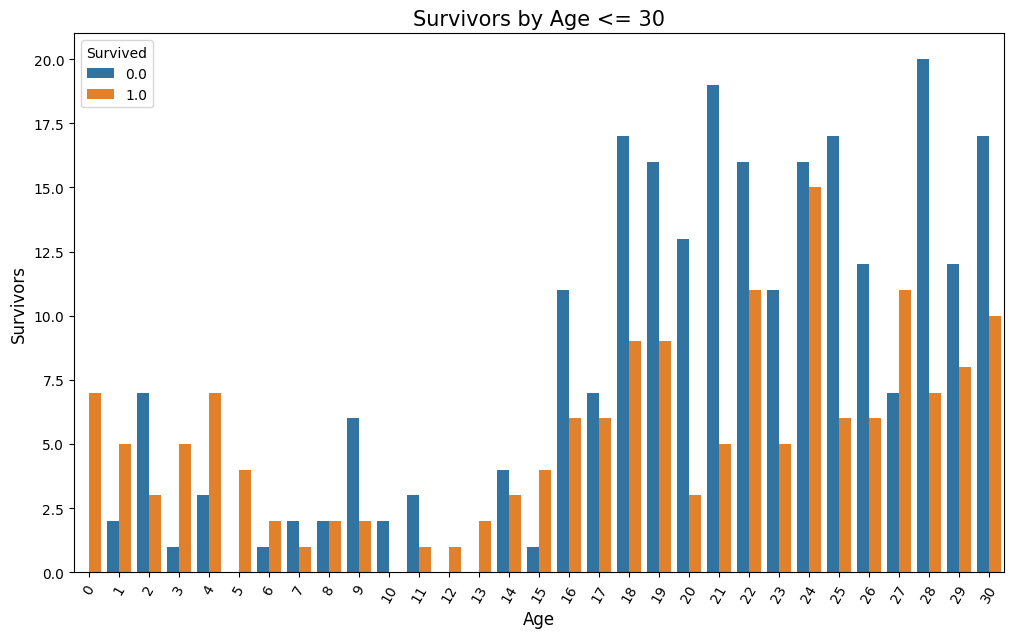

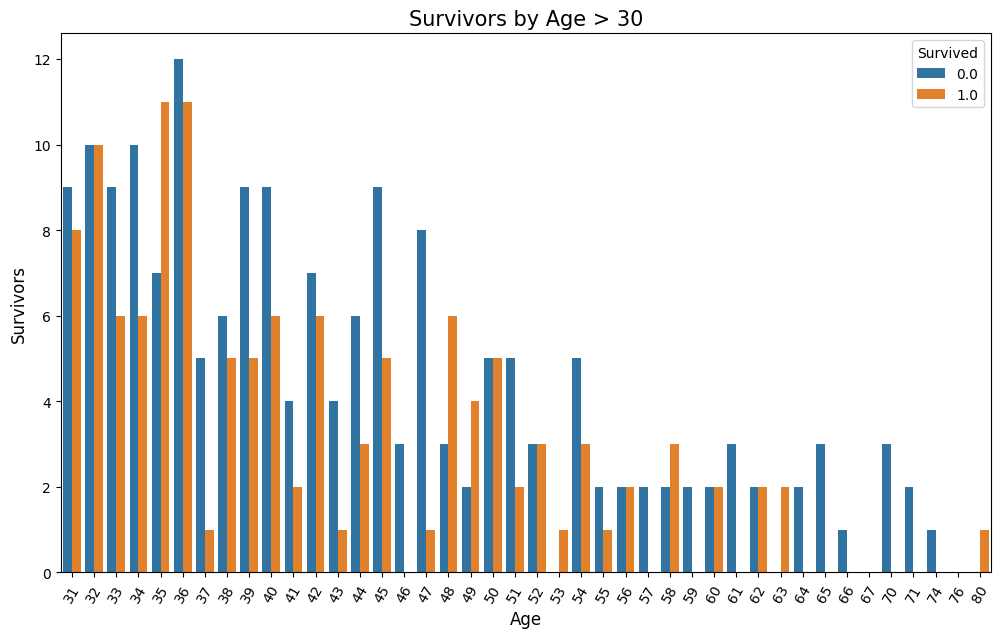

In [8]:
show_survivors_by_age_fare('Age')

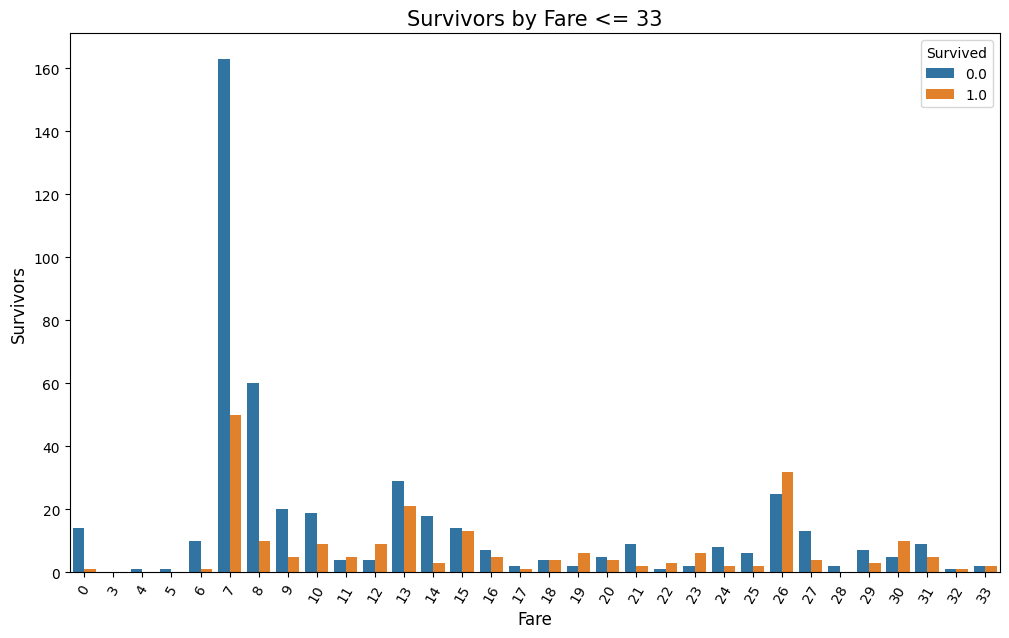

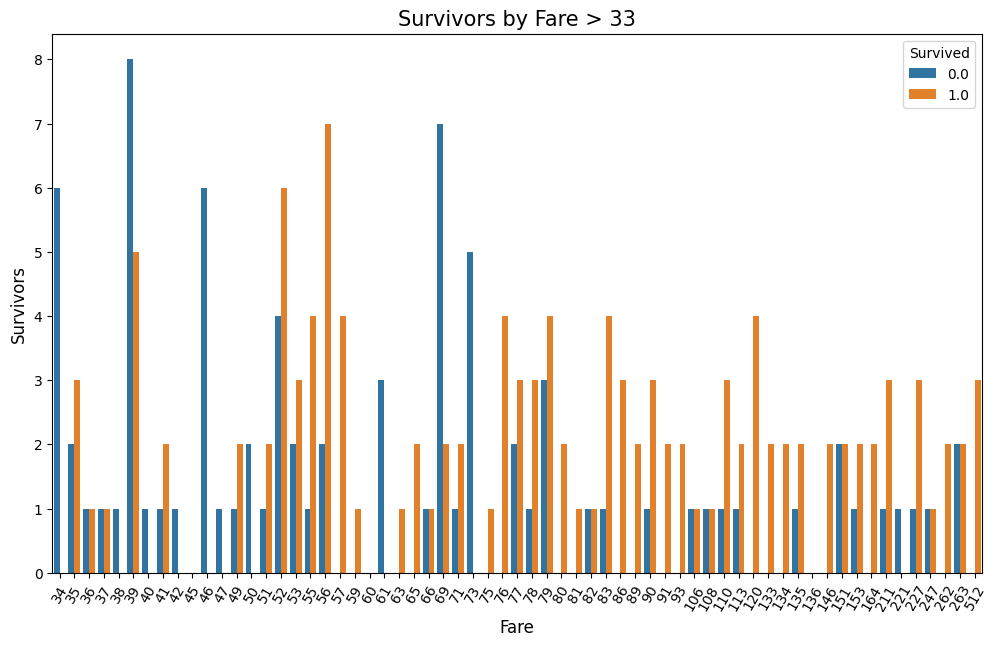

In [9]:
show_survivors_by_age_fare('Fare')

---

In [10]:
def show_corr_matrix(columns):
    df_corr = df.copy()
    df_corr = pd.get_dummies(df_corr[columns])
    df_corr = df_corr.corr()
    plt.figure(figsize=(15,7))
    sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.show()

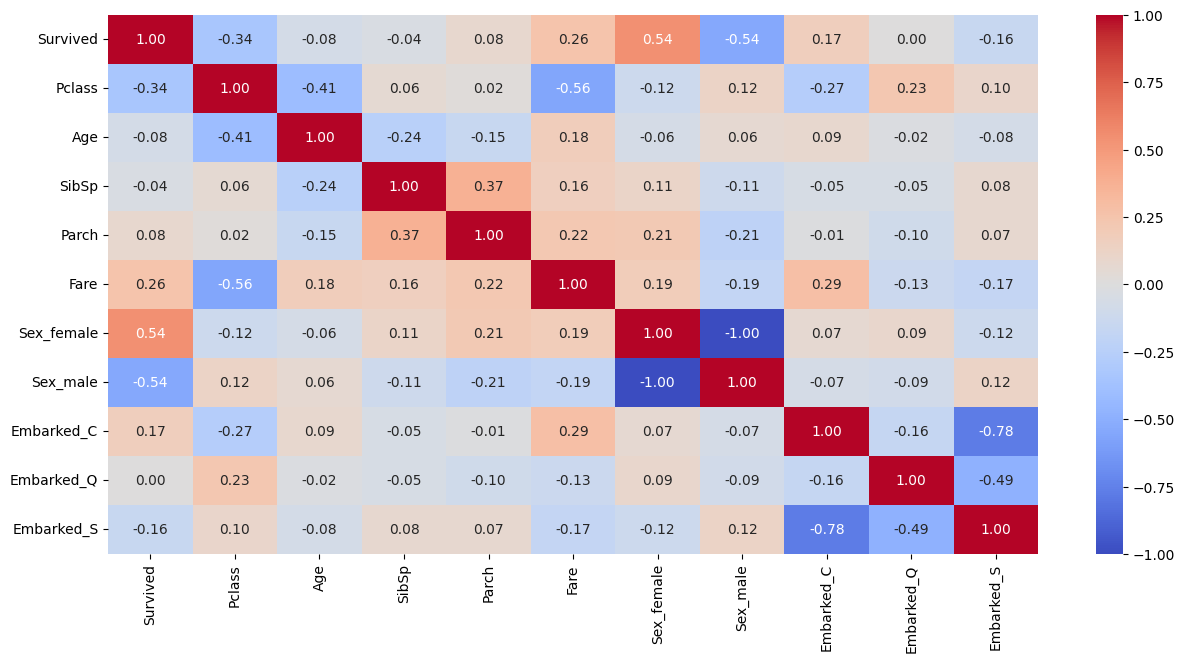

In [11]:
show_corr_matrix(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex', 'Embarked'])

---

# 2. Outliers

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


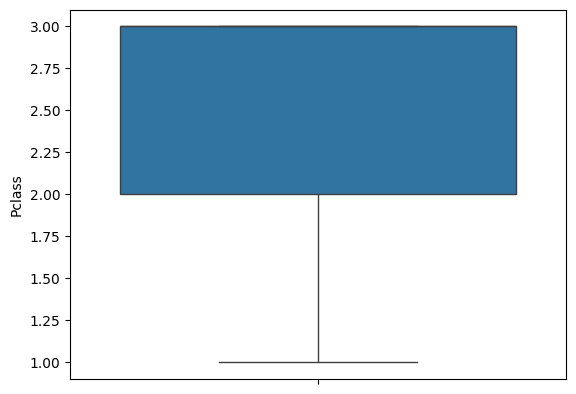

In [13]:
sns.boxplot(df['Pclass']);

---

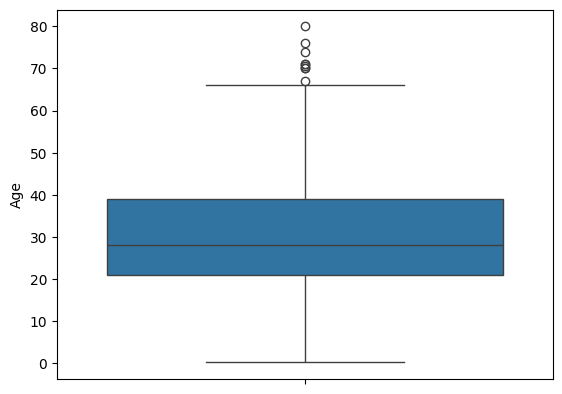

In [14]:
sns.boxplot(df['Age']);

In [15]:
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
age_outlier = Q3 + 1.5 * IQR

In [16]:
index_age_outliers = df.query(f"Age > {age_outlier}").index
df.loc[index_age_outliers, 'Age'] = age_outlier

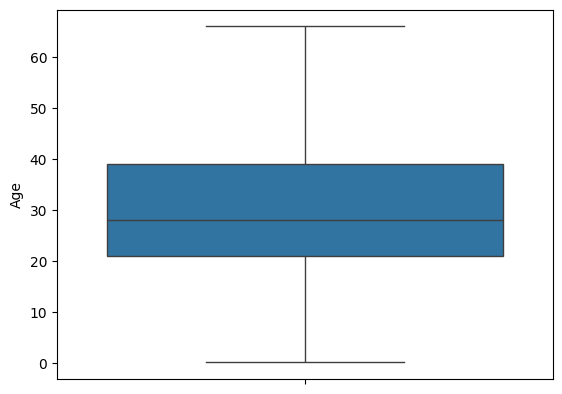

In [17]:
sns.boxplot(df['Age']);

---

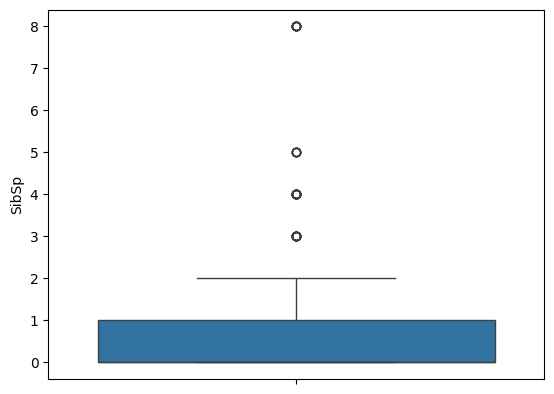

In [18]:
sns.boxplot(df['SibSp']);

In [19]:
df.query("SibSp > 5")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0.0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0.0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0.0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0.0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0.0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0.0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0.0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S
1079,1080,NaN,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.55,NaN,S
1251,1252,NaN,3,"Sage, Master. William Henry",male,14.5,8,2,CA. 2343,69.55,NaN,S


In [20]:
df.query("Parch > 8")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1233,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
1256,1257,NaN,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S


They are really a family lol

---

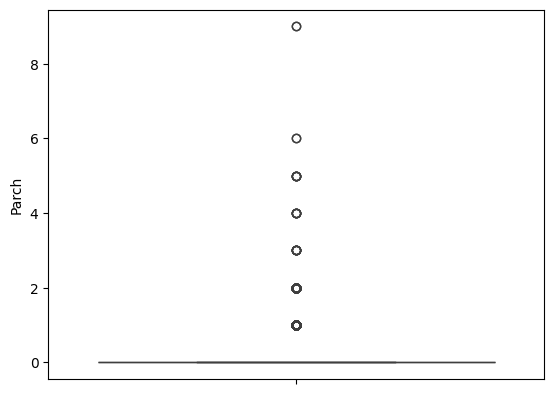

In [21]:
sns.boxplot(df['Parch']);

In [22]:
df.query("Parch > 5")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
678,679,0.0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",female,43.0,1,6,CA 2144,46.90,NaN,S
1030,1031,NaN,3,"Goodwin, Mr. Charles Frederick",male,40.0,1,6,CA 2144,46.90,NaN,S
1233,1234,NaN,3,"Sage, Mr. John George",male,NaN,1,9,CA. 2343,69.55,NaN,S
1256,1257,NaN,3,"Sage, Mrs. John (Annie Bullen)",female,NaN,1,9,CA. 2343,69.55,NaN,S


In [23]:
df.query("SibSp == 5")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0.0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0.0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0.0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0.0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
683,684,0.0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S
1031,1032,NaN,3,"Goodwin, Miss. Jessie Allis",female,10.0,5,2,CA 2144,46.9,NaN,S


Family too

---

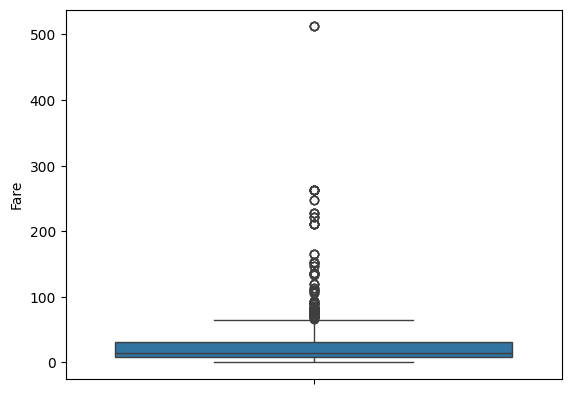

In [24]:
sns.boxplot(df['Fare']);

In [25]:
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
fare_outlier = Q3 + 1.5 * IQR

In [26]:
indexes_fare_outliers = df.query(f"Fare > {fare_outlier}").index
df.loc[indexes_fare_outliers, 'Fare'] = fare_outlier

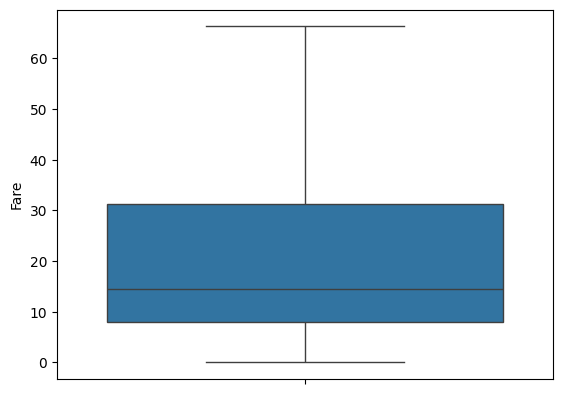

In [27]:
sns.boxplot(df['Fare']);

In [28]:
df.query("Fare == 0").shape

(17, 12)

In [29]:
df.query("Fare == 0")['Pclass'].value_counts()

Pclass
1    7
2    6
3    4
Name: count, dtype: int64

For Fare == 0, I'll change them according to the mean Fare of each Pclass

In [30]:
mean_fare_pclass1 = df.query("Pclass == 1")['Fare'].mean()
indexes_outliers1 = df.query("Pclass == 1 and Fare == 0").index
df.loc[indexes_outliers1, 'Fare'] = mean_fare_pclass1

In [31]:
mean_fare_pclass2 = df.query("Pclass == 2")['Fare'].mean()
indexes_outliers2 = df.query("Pclass == 2 and Fare == 0").index
df.loc[indexes_outliers2, 'Fare'] = mean_fare_pclass2

In [32]:
mean_fare_pclass3 = df.query("Pclass == 3")['Fare'].mean()
indexes_outliers3 = df.query("Pclass == 3 and Fare == 0").index
df.loc[indexes_outliers3, 'Fare'] = mean_fare_pclass3

In [33]:
df.query("Fare == 0").shape

(0, 12)

# 3. Duplicated rows

In [34]:
df.duplicated().sum()

np.int64(0)

# 4. Adjusting columns

In [35]:
df.drop(columns=['PassengerId'], inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,66.3438,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,66.3438,C85,C
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [37]:
# Changing the values in Cabin and Ticket to first letter only
df['Cabin'] = df['Cabin'].str[0]
df['Ticket'] = df['Ticket'].str[0]
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A,7.2500,NaN,S
1,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,P,66.3438,C,C
2,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,S,7.9250,NaN,S
3,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,1,53.1000,C,S
4,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,3,8.0500,NaN,S


In [38]:
# Taking just the title in the Name column and renaming it to Title
df['Name'] = df['Name'].str.split().str[1].str.replace('.', '').str.replace(',','')
df.rename(columns={'Name': 'Title'}, inplace=True)
df.head()

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.0,3,Mr,1,22.0,1,0,A,7.2500,NaN,S
1,1.0,1,Mrs,0,38.0,1,0,P,66.3438,C,C
2,1.0,3,Miss,0,26.0,0,0,S,7.9250,NaN,S
3,1.0,1,Mrs,0,35.0,1,0,1,53.1000,C,S
4,0.0,3,Mr,1,35.0,0,0,3,8.0500,NaN,S


## 4.1 Working on Title

In [39]:
df['Title'].value_counts()

Title
Mr             736
Miss           256
Mrs            191
Master          59
Rev              8
Dr               8
y                8
Planke           4
Col              4
Billiard         3
Impe             3
Carlo            2
Mlle             2
Gordon           2
Major            2
Messemaeker      2
Ms               2
Walle            1
Mme              1
Steen            1
Pelsmaeker       1
Mulder           1
der              1
Don              1
Capt             1
Velde            1
the              1
Shawah           1
Jonkheer         1
Melkebeke        1
Cruyssen         1
Khalil           1
Palmquist        1
Brito            1
Name: count, dtype: int64

**I'll keep Mr, Miss, Mrs and Master. Other titles I'll change to "Others"**

In [40]:
other_titles = df[~df['Title'].isin(['Mr', 'Miss', 'Mrs', 'Master'])].index
df.loc[other_titles, 'Title'] = 'Others'

In [41]:
df['Title'].value_counts()

Title
Mr        736
Miss      256
Mrs       191
Others     67
Master     59
Name: count, dtype: int64

**The passengers with Others I'll change to Mrs, Miss, Mr or Master**

In [42]:
df_others = df.query("Title == 'Others'").copy()
index_others = df_others.index

**Mrs - married female**

In [43]:
mrs_index = df_others.query("Sex == 0").index
df.loc[mrs_index, 'Title'] = 'Mrs'

**Miss - unmarried female**

In [44]:
miss_index = df_others.query("(Sex == 0) and (SibSp != 1 or Age < 18)").index # "or Age < 18" for minors with 1 brother
df.loc[miss_index, 'Title'] = 'Miss'

In [45]:
df.query("Title == 'Master'")['Age'].max()

np.float64(14.5)

**Mr - male >= 15 years old**

In [46]:
mr_index = df_others.query("Sex == 1").index
df.loc[mr_index, 'Title'] = 'Mr'

**Master - male < 15 years old**

In [47]:
master_index = df_others.query("(Sex == 1) and (Age < 15)").index
df.loc[master_index, 'Title'] = 'Master'

In [48]:
df['Title'].value_counts()

Title
Mr        783
Miss      268
Mrs       198
Master     60
Name: count, dtype: int64

## 4.2 New columns

### "SexPclass"

In [49]:
df['SexPclass'] = df['Sex'].astype(str) + '-' + df['Pclass'].astype(str)
df.head()

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexPclass
0,0.0,3,Mr,1,22.0,1,0,A,7.2500,NaN,S,1-3
1,1.0,1,Mrs,0,38.0,1,0,P,66.3438,C,C,0-1
2,1.0,3,Miss,0,26.0,0,0,S,7.9250,NaN,S,0-3
3,1.0,1,Mrs,0,35.0,1,0,1,53.1000,C,S,0-1
4,0.0,3,Mr,1,35.0,0,0,3,8.0500,NaN,S,1-3


### "Companion" that contains "Family and Alone"

In [50]:
df['Companion'] = 0 # Alone

**Family**

In [51]:
family_indexes = df.query("(SibSp > 0) or (Parch > 0) or (Age < 18)").index # "Some children travelled only with a nanny, therefore parch=0 for them." so I needed to put "Age < 18"
df.loc[family_indexes, 'Companion'] = 1 # Family

In [52]:
df['Companion'].value_counts()

Companion
0    758
1    551
Name: count, dtype: int64

In [53]:
df.sample(5)

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexPclass,Companion
139,0.0,1,Mr,1,24.0,0,0,P,66.3438,B,C,1-1,0
388,0.0,3,Mr,1,NaN,0,0,3,7.7292,NaN,Q,1-3,0
349,0.0,3,Mr,1,42.0,0,0,3,8.6625,NaN,S,1-3,0
1260,NaN,2,Mr,1,29.0,0,0,S,13.8583,NaN,C,1-2,0
875,1.0,3,Miss,0,15.0,0,0,2,7.2250,NaN,C,0-3,1


# 5. Missing values

In [54]:
df.isna().sum()

Survived      418
Pclass          0
Title           0
Sex             0
Age           263
SibSp           0
Parch           0
Ticket          0
Fare            1
Cabin        1014
Embarked        2
SexPclass       0
Companion       0
dtype: int64

## 5.1 Age

In [55]:
df.head()

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexPclass,Companion
0,0.0,3,Mr,1,22.0,1,0,A,7.2500,NaN,S,1-3,1
1,1.0,1,Mrs,0,38.0,1,0,P,66.3438,C,C,0-1,1
2,1.0,3,Miss,0,26.0,0,0,S,7.9250,NaN,S,0-3,0
3,1.0,1,Mrs,0,35.0,1,0,1,53.1000,C,S,0-1,1
4,0.0,3,Mr,1,35.0,0,0,3,8.0500,NaN,S,1-3,0


In [56]:
def show_ages_by_title(title):
    ages_by_title = df.query(f'Title == "{title}"')['Age'].value_counts().sort_index()
    plt.figure(figsize=(15,5))
    ages_by_title.plot.bar()
    plt.title(f"Ages of {title}")
    plt.xticks(rotation=60)
    plt.show()

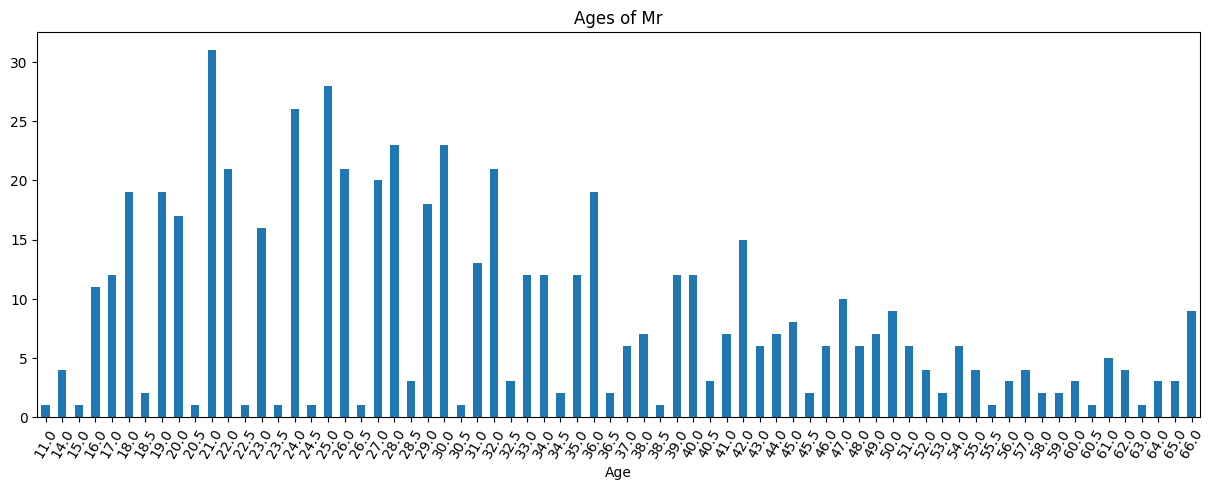

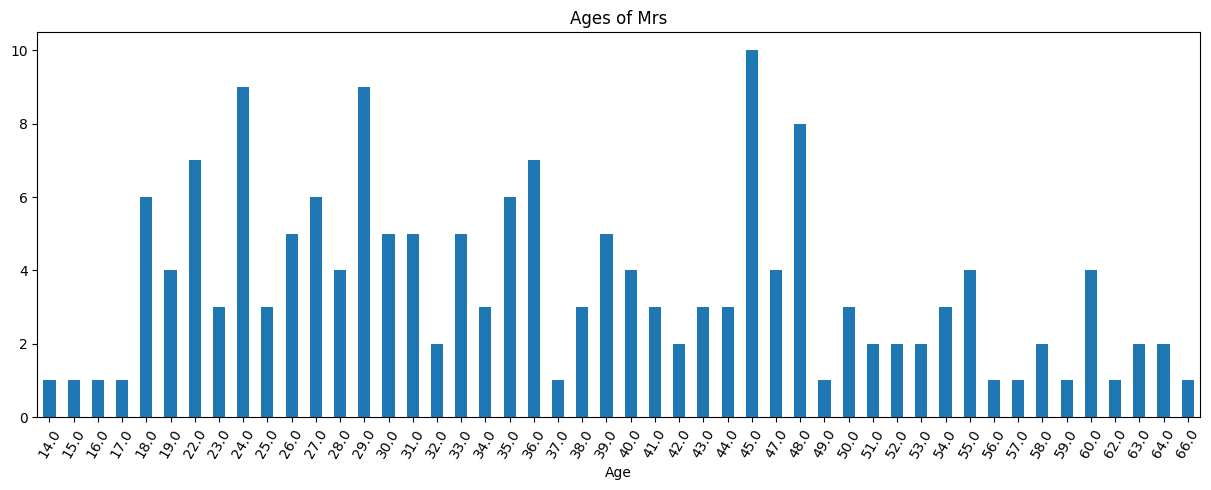

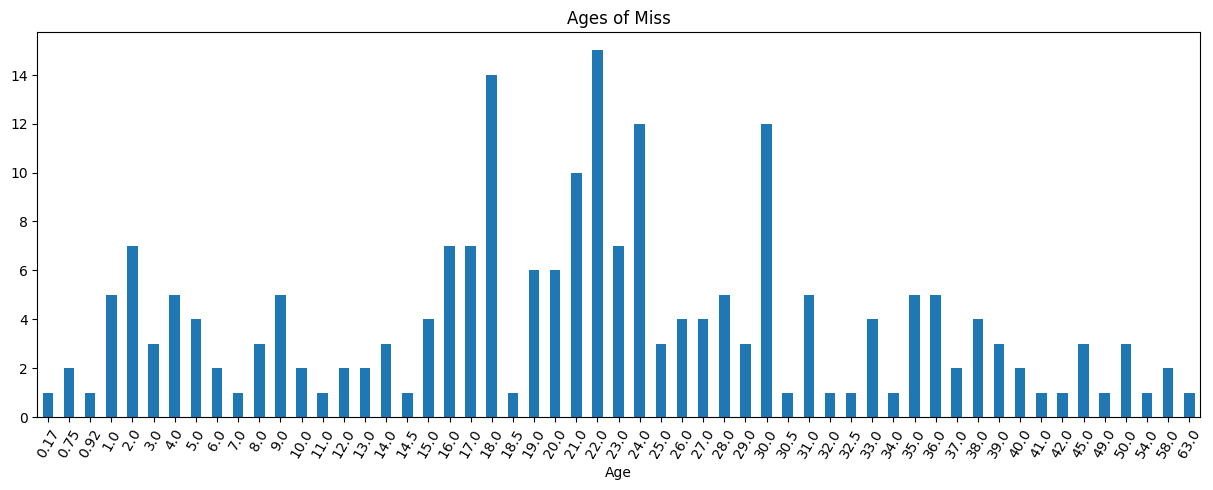

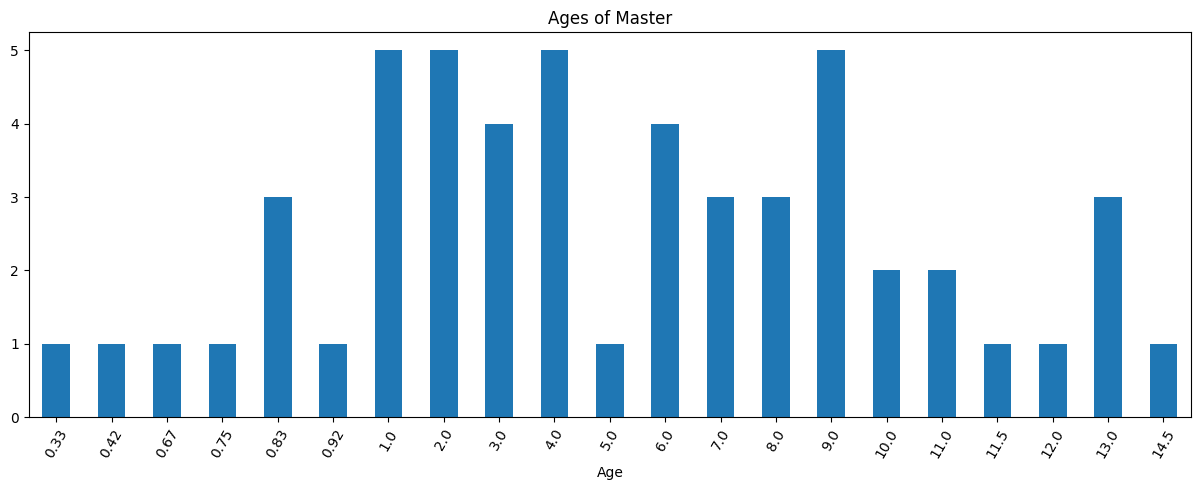

In [57]:
titles = df['Title'].unique()
for title in titles:
    show_ages_by_title(title)

To fill the NaN ages I'll:
1. Take the min and max age of each title (Mrs, Miss, Mr, Master)
2. Fill randomly according to min and max range

In [ ]:
def fill_nan_age_by_title(title):
    min_age = df.query(f"Title == '{title}'")['Age'].min()
    max_age = df.query(f"Title == '{title}'")['Age'].max()
    range_ages_by_title = np.arange(round(min_age), round(max_age))
    
    def random_age():
        return np.random.choice(range_ages_by_title)
    
    df.loc[df['Title'] == title, 'Age'] = df.loc[df['Title'] == title, 'Age'].apply(lambda row: random_age() if pd.isnull(row) else row)

In [59]:
for title in titles:
    fill_nan_age_by_title(title)

In [60]:
df['Age'].isna().sum()

np.int64(0)

### New column "AgeWeight"
This column has the Age multiplied by Pclass

In [61]:
df['AgeWeight'] = df['Age'] * df['Pclass']

In [62]:
df.sample(5)

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexPclass,Companion,AgeWeight
198,1.0,3,Miss,0,20.0,0,0,3,7.7500,NaN,Q,0-3,0,60.0
1163,NaN,1,Mrs,0,26.0,1,0,1,66.3438,C,C,0-1,1,26.0
874,1.0,2,Mrs,0,28.0,1,0,P,24.0000,NaN,C,0-2,1,56.0
289,1.0,3,Miss,0,22.0,0,0,3,7.7500,NaN,Q,0-3,0,66.0
184,1.0,3,Miss,0,4.0,0,2,3,22.0250,NaN,S,0-3,1,12.0


### New column "AgeGroup"
**Little**: 0-5 years old <br>
**Child**: 6-17 years old <br>
**Young**: 18-29 years old <br>
**Adult**: 30-59 years old <br>
**Elder**: 60+ years old <br>

In [ ]:
df['AgeGroup'] = 'Little'

In [64]:
child_indexes = df.query('Age >= 6').index
df.loc[child_indexes, 'AgeGroup'] = 'Child'

In [65]:
young_indexes = df.query('Age >= 18').index
df.loc[young_indexes, 'AgeGroup'] = 'Young'

In [66]:
adult_indexes = df.query('Age >= 30').index
df.loc[adult_indexes, 'AgeGroup'] = 'Adult'

In [67]:
elder_indexes = df.query('Age >= 60').index
df.loc[elder_indexes, 'AgeGroup'] = 'Elder'

In [68]:
df['AgeGroup'].value_counts()

AgeGroup
Adult     575
Young     473
Child     135
Elder      65
Little     61
Name: count, dtype: int64

In [69]:
df.sample(5)

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexPclass,Companion,AgeWeight,AgeGroup
843,0.0,3,Mr,1,34.5,0,0,2,6.4375,NaN,C,1-3,0,103.5,Adult
869,1.0,3,Master,1,4.0,1,1,3,11.1333,NaN,S,1-3,1,12.0,Little
254,0.0,3,Mrs,0,41.0,0,2,3,20.2125,NaN,S,0-3,1,123.0,Adult
1146,NaN,3,Mr,1,15.0,0,0,C,7.5500,NaN,S,1-3,0,45.0,Child
188,0.0,3,Mr,1,40.0,1,1,3,15.5000,NaN,Q,1-3,1,120.0,Adult


## 5.2 Fare

In [70]:
df['Fare'].isna().sum()

np.int64(1)

In [71]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean())

### New column FareWeight
This column has the Fare divided by Pclass

In [72]:
df['FareWeight'] = df['Fare'] / df['Pclass']

In [73]:
df.sample(5)

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexPclass,Companion,AgeWeight,AgeGroup,FareWeight
629,0.0,3,Mr,1,20.0,0,0,3,7.733300,NaN,Q,1-3,0,60.0,Young,2.577767
900,NaN,3,Mr,1,21.0,2,0,A,24.150000,NaN,S,1-3,1,63.0,Young,8.050000
623,0.0,3,Mr,1,21.0,0,0,3,7.854200,NaN,S,1-3,0,63.0,Young,2.618067
287,0.0,3,Mr,1,22.0,0,0,3,7.895800,NaN,S,1-3,0,66.0,Young,2.631933
179,0.0,3,Mr,1,36.0,0,0,L,13.253075,NaN,S,1-3,0,108.0,Adult,4.417692


### New column FareCategory

In [74]:
print(df['Fare'].quantile(0.25))
print(df['Fare'].quantile(0.50))
print(df['Fare'].quantile(0.75))
print(df['Fare'].quantile(1))

7.925
14.5
31.3875
66.34379999999999


**Budget**: Fare quantile until 25% <br>
**Economy**: Fare quantile 26% - 50% <br>
**Standard**: Fare quantile 51% - 75% <br>
**Premium**: Fare quantile 76% - 99% <br>
**Luxuary**: Fare quantile 100% <br>

In [75]:
df['FareCategory'] = 'Budget'

In [76]:
economy_index = df.query(f"Fare > {df['Fare'].quantile(0.25)}").index
df.loc[economy_index, 'FareCategory'] = 'Economy'

In [77]:
standard_index = df.query(f"Fare > {df['Fare'].quantile(0.50)}").index
df.loc[standard_index, 'FareCategory'] = 'Standard'

In [78]:
premium_index = df.query(f"Fare > {df['Fare'].quantile(0.75)}").index
df.loc[premium_index, 'FareCategory'] = 'Premium'

In [79]:
luxuary_index = df.query(f"Fare == {df['Fare'].quantile(1)}").index
df.loc[luxuary_index, 'FareCategory'] = 'Luxuary'

In [80]:
df['FareCategory'].value_counts()

FareCategory
Budget      343
Standard    327
Economy     316
Luxuary     171
Premium     152
Name: count, dtype: int64

In [81]:
df.sample(5)

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexPclass,Companion,AgeWeight,AgeGroup,FareWeight,FareCategory
929,NaN,3,Mr,1,25.0,0,0,3,9.5000,NaN,S,1-3,0,75.0,Young,3.166667,Economy
698,0.0,1,Mr,1,49.0,1,1,1,66.3438,C,C,1-1,1,49.0,Adult,66.343800,Luxuary
8,1.0,3,Mrs,0,27.0,0,2,3,11.1333,NaN,S,0-3,1,81.0,Young,3.711100,Economy
979,NaN,3,Miss,0,48.0,0,0,3,7.7500,NaN,Q,0-3,0,144.0,Adult,2.583333,Budget
240,0.0,3,Miss,0,18.0,1,0,2,14.4542,NaN,C,0-3,1,54.0,Young,4.818067,Economy


## 5.3 Cabins

**I'll try to find columns that have correlation with Cabin**

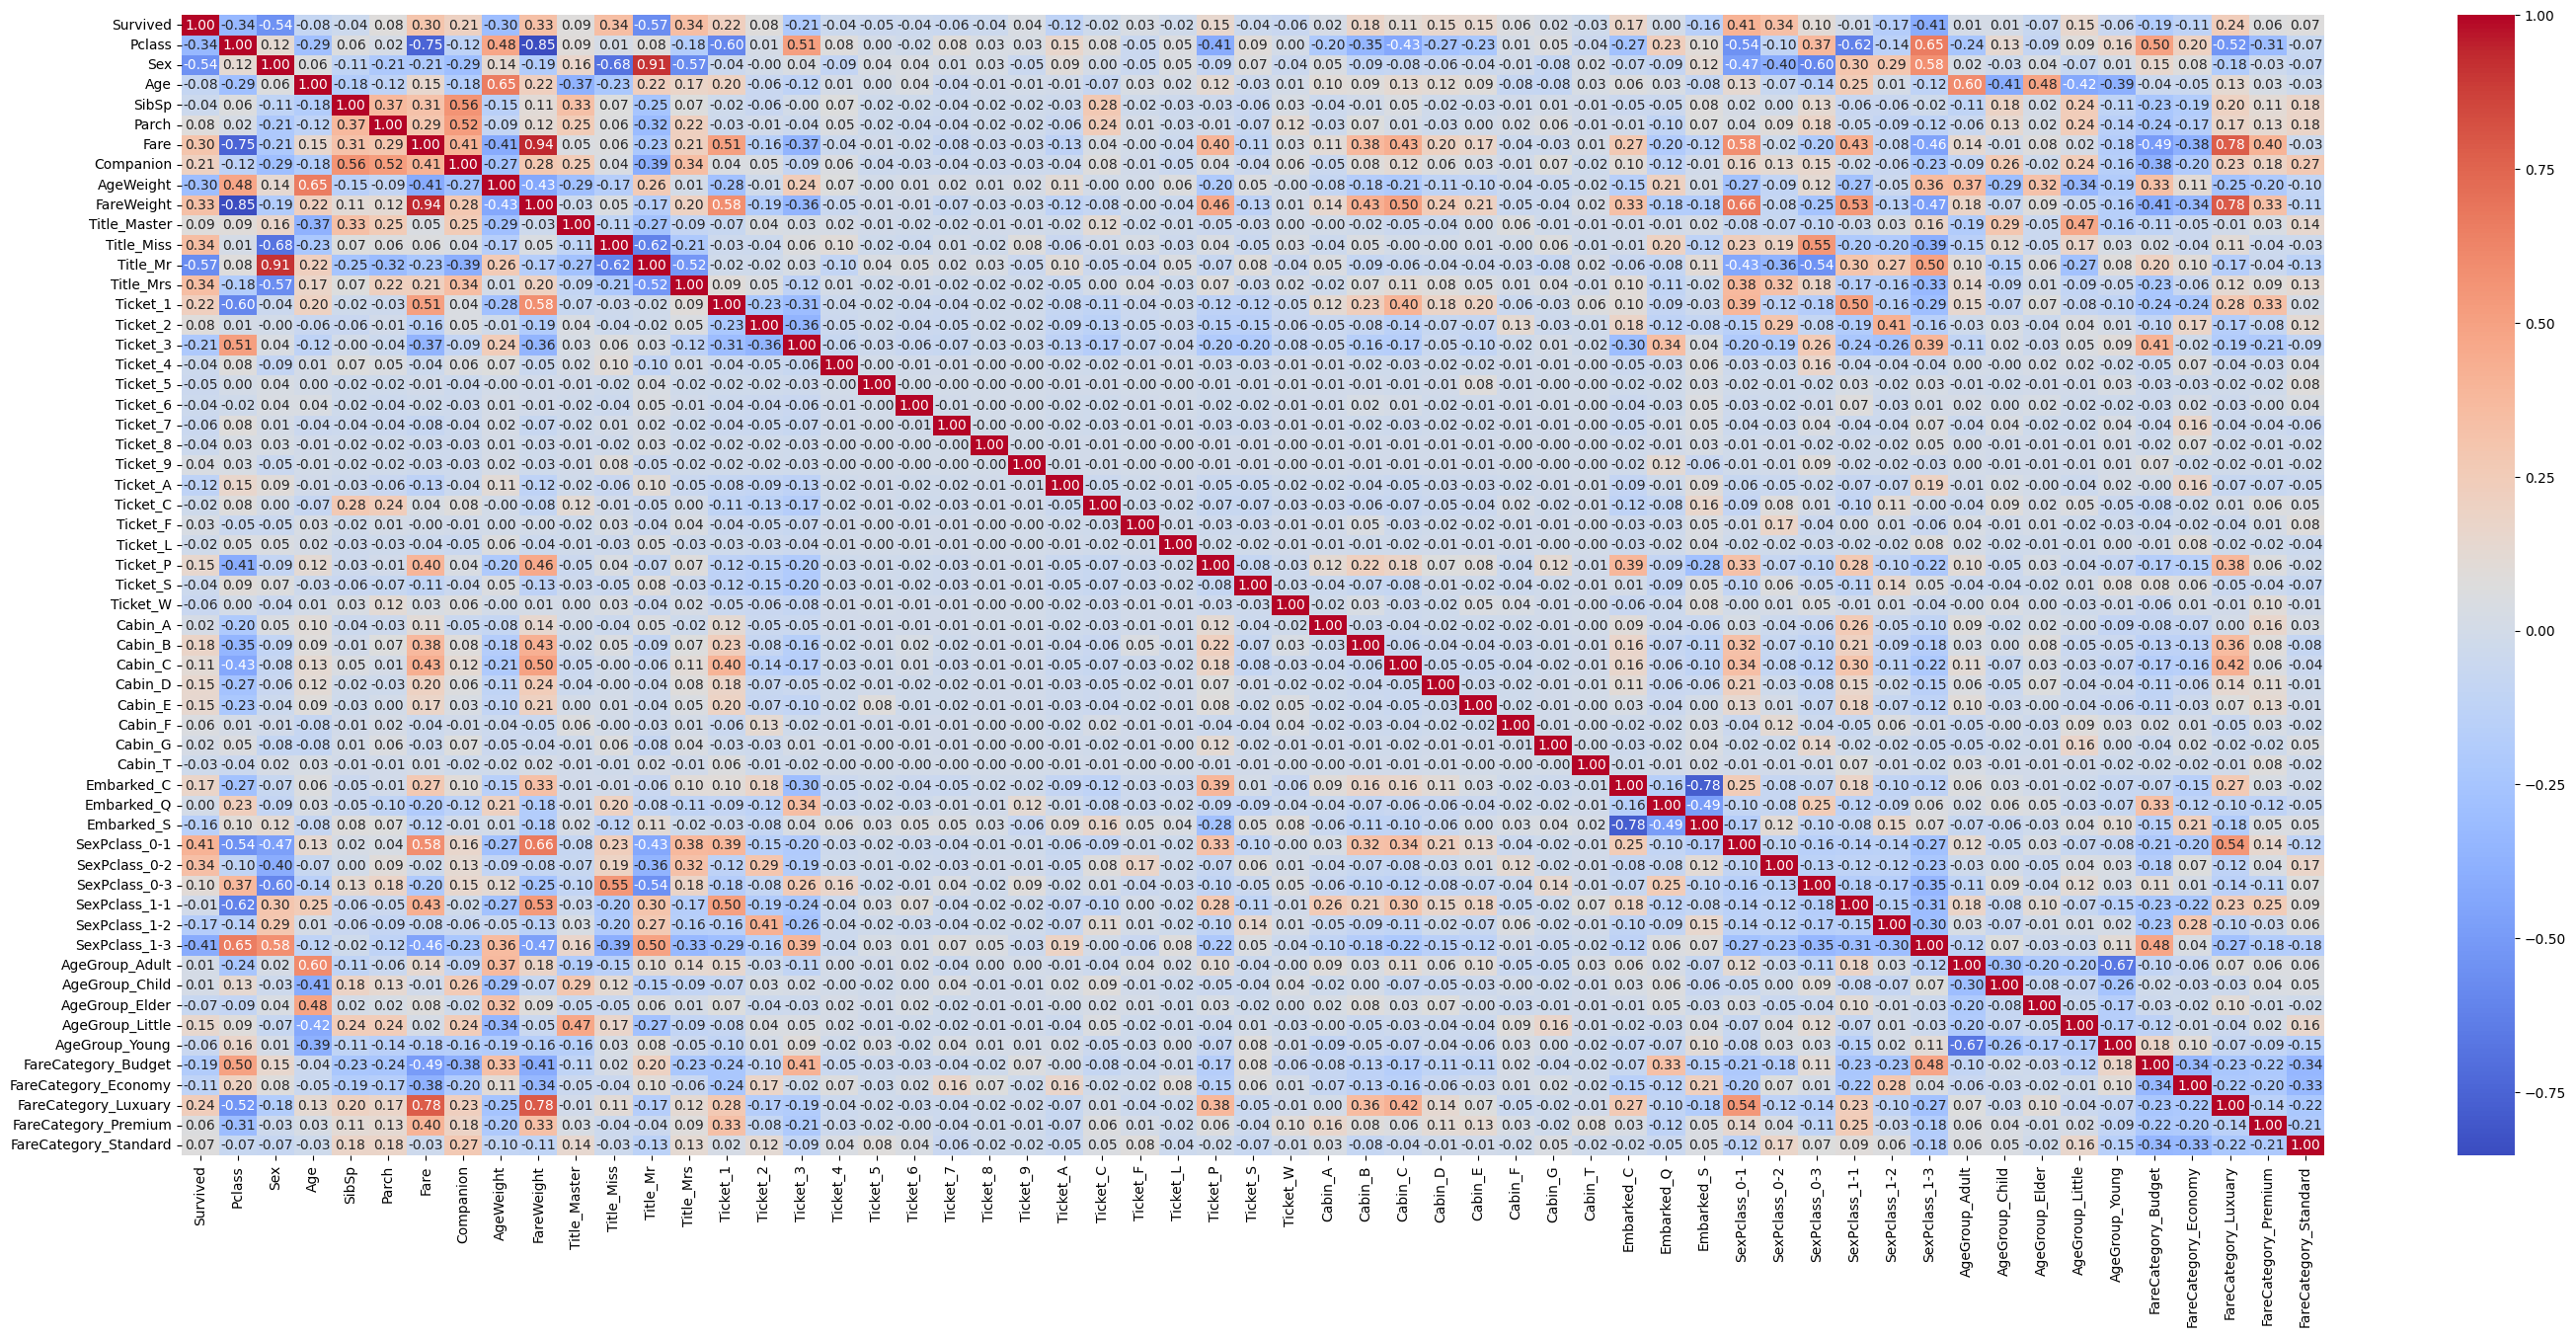

In [82]:
df_dummies = pd.get_dummies(df)
df_dummies_corr = df_dummies.corr()
plt.figure(figsize=(35,15))
sns.heatmap(df_dummies_corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

**I'll see Pclasses, Tickets, Embarked and FareCategories of each cabin**

In [83]:
cabins_list = sorted(df['Cabin'].unique()[1:]) # First is NaN
cabins_list

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'T']

In [84]:
for cabin in cabins_list:
    pclass_per_cabin = df.query(f"Cabin == '{cabin}'")['Pclass'].value_counts().to_dict()
    print(f'Cabin {cabin}: - Pclass: {pclass_per_cabin}')

Cabin A: - Pclass: {1: 22}
Cabin B: - Pclass: {1: 65}
Cabin C: - Pclass: {1: 94}
Cabin D: - Pclass: {1: 40, 2: 6}
Cabin E: - Pclass: {1: 34, 2: 4, 3: 3}
Cabin F: - Pclass: {2: 13, 3: 8}
Cabin G: - Pclass: {3: 5}
Cabin T: - Pclass: {1: 1}


In [85]:
for cabin in cabins_list:
    pclass_per_cabin = df.query(f"Cabin == '{cabin}'")['Ticket'].value_counts().to_dict()
    print(f'Cabin {cabin}: - Ticket: {pclass_per_cabin}')

Cabin A: - Ticket: {'1': 11, 'P': 7, '3': 3, '2': 1}
Cabin B: - Ticket: {'1': 34, 'P': 21, '2': 5, 'W': 2, 'F': 2, '6': 1}
Cabin C: - Ticket: {'1': 65, 'P': 23, '3': 4, '2': 1, '6': 1}
Cabin D: - Ticket: {'1': 23, '3': 9, 'P': 8, '2': 3, 'S': 3}
Cabin E: - Ticket: {'1': 23, 'P': 8, '3': 3, '2': 2, 'W': 2, 'S': 2, '5': 1}
Cabin F: - Ticket: {'2': 13, '3': 5, 'C': 2, 'W': 1}
Cabin G: - Ticket: {'P': 3, '3': 2}
Cabin T: - Ticket: {'1': 1}


In [86]:
for cabin in cabins_list:
    pclass_per_cabin = df.query(f"Cabin == '{cabin}'")['Embarked'].value_counts().to_dict()
    print(f'Cabin {cabin}: - Embarked: {pclass_per_cabin}')

Cabin A: - Embarked: {'S': 11, 'C': 11}
Cabin B: - Embarked: {'C': 32, 'S': 31}
Cabin C: - Embarked: {'S': 50, 'C': 41, 'Q': 3}
Cabin D: - Embarked: {'S': 26, 'C': 20}
Cabin E: - Embarked: {'S': 29, 'C': 11, 'Q': 1}
Cabin F: - Embarked: {'S': 17, 'C': 3, 'Q': 1}
Cabin G: - Embarked: {'S': 5}
Cabin T: - Embarked: {'S': 1}


In [87]:
for cabin in cabins_list:
    pclass_per_cabin = df.query(f"Cabin == '{cabin}'")['FareCategory'].value_counts().to_dict()
    print(f'Cabin {cabin}: - FareCategory: {pclass_per_cabin}')

Cabin A: - FareCategory: {'Premium': 11, 'Standard': 8, 'Luxuary': 3}
Cabin B: - FareCategory: {'Luxuary': 43, 'Premium': 15, 'Standard': 6, 'Budget': 1}
Cabin C: - FareCategory: {'Luxuary': 60, 'Premium': 17, 'Standard': 17}
Cabin D: - FareCategory: {'Luxuary': 17, 'Premium': 14, 'Standard': 10, 'Economy': 5}
Cabin E: - FareCategory: {'Premium': 14, 'Luxuary': 11, 'Standard': 9, 'Economy': 7}
Cabin F: - FareCategory: {'Budget': 7, 'Economy': 6, 'Standard': 4, 'Premium': 4}
Cabin G: - FareCategory: {'Standard': 3, 'Economy': 2}
Cabin T: - FareCategory: {'Premium': 1}


**The only column I could find a significant correlation with Cabin is Pclass** <br>
Cabin A - Pclass 1 (22 people) <br>
Cabin B - Pclass 1 (65 people) <br>
Cabin C - Pclass 1 (94 people) <br>
Cabin D - Pclass 1 (40 people) | 2 (6 people) <br>
Cabin E - Pclass 1 (34 people) | 2 (4 people) | 3 (3 people) <br>
Cabin F - Pclass 2 (13 people) | 3 (8 people) <br>
Cabin G - Pclass 3 (5 people) <br>
Cabin T - Pclass 1 (1 person) <br>
**But there is little information, so I'm going to fill null cabins with 0**

In [88]:
df['Cabin'] = df['Cabin'].fillna('0')

In [89]:
df['Cabin'].isna().sum()

np.int64(0)

## 5.4 Embarked

In [90]:
df[df['Embarked'].isna()]

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexPclass,Companion,AgeWeight,AgeGroup,FareWeight,FareCategory
61,1.0,1,Miss,0,38.0,0,0,1,66.3438,B,NaN,0-1,0,38.0,Adult,66.3438,Luxuary
829,1.0,1,Mrs,0,62.0,0,0,1,66.3438,B,NaN,0-1,0,62.0,Elder,66.3438,Luxuary


The 2 passengers stayed in Cabin B, so I'm filling with 'C', because it has the highest correlation.

In [91]:
df['Embarked'] = df['Embarked'].fillna('C')

In [92]:
df.isna().sum()

Survived        418
Pclass            0
Title             0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
SexPclass         0
Companion         0
AgeWeight         0
AgeGroup          0
FareWeight        0
FareCategory      0
dtype: int64

# 6. Exploratory Data Analysis - New Columns

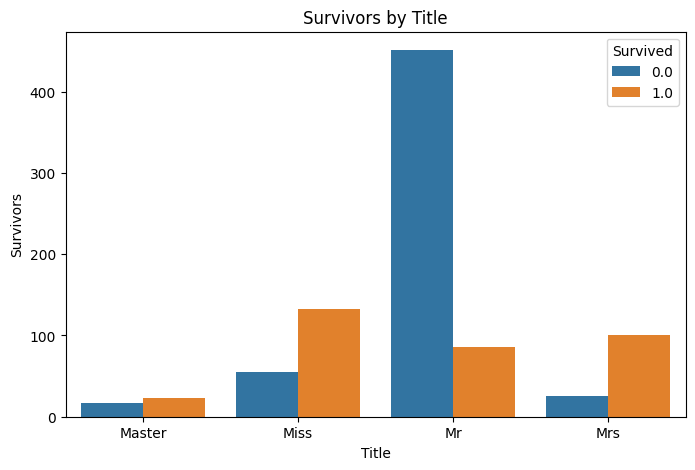

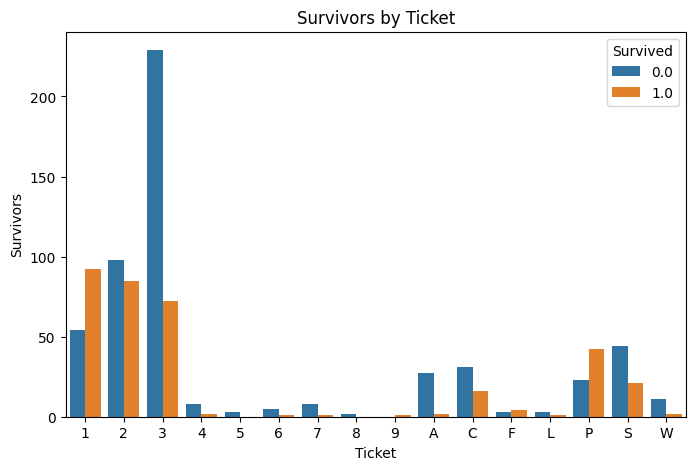

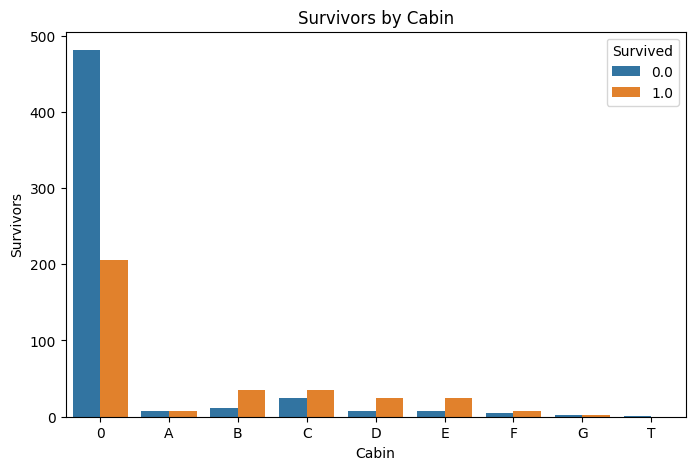

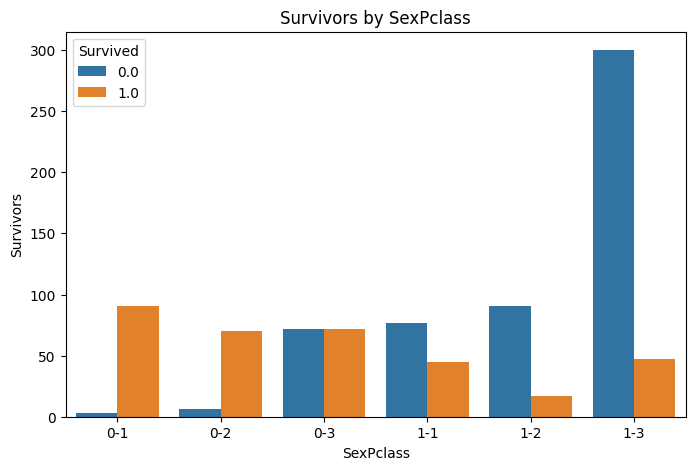

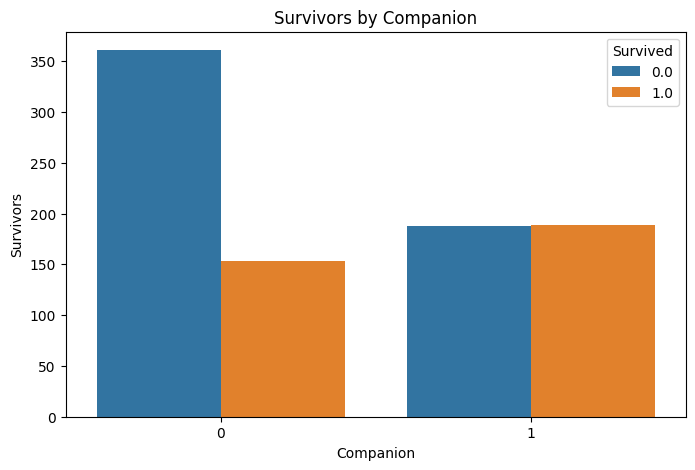

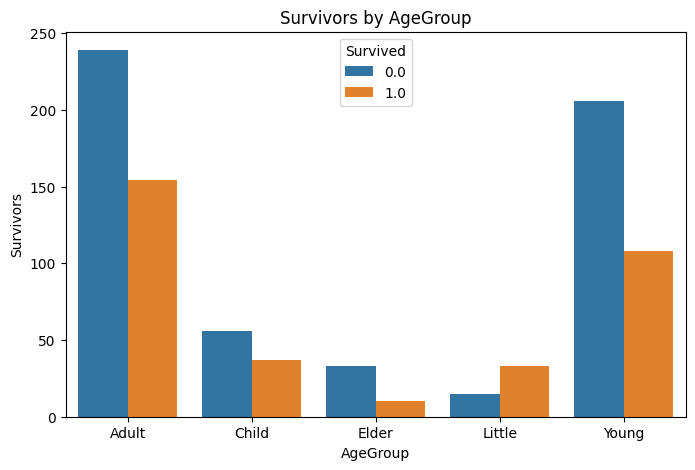

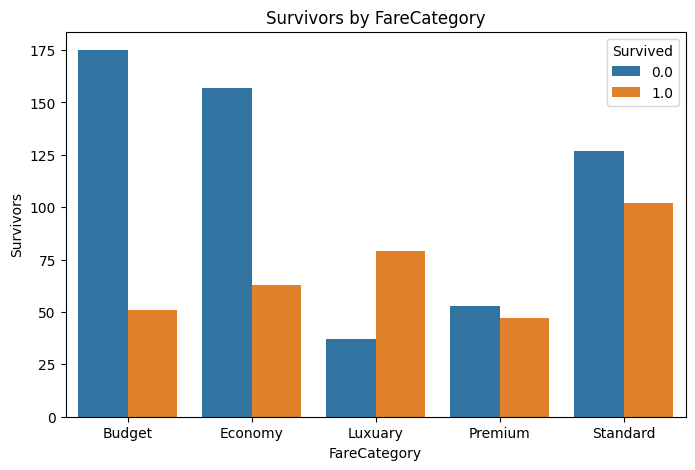

In [93]:
show_survivors_by_column('Title')
show_survivors_by_column('Ticket')
show_survivors_by_column('Cabin')
show_survivors_by_column('SexPclass')
show_survivors_by_column('Companion')
show_survivors_by_column('AgeGroup')
show_survivors_by_column('FareCategory')

---

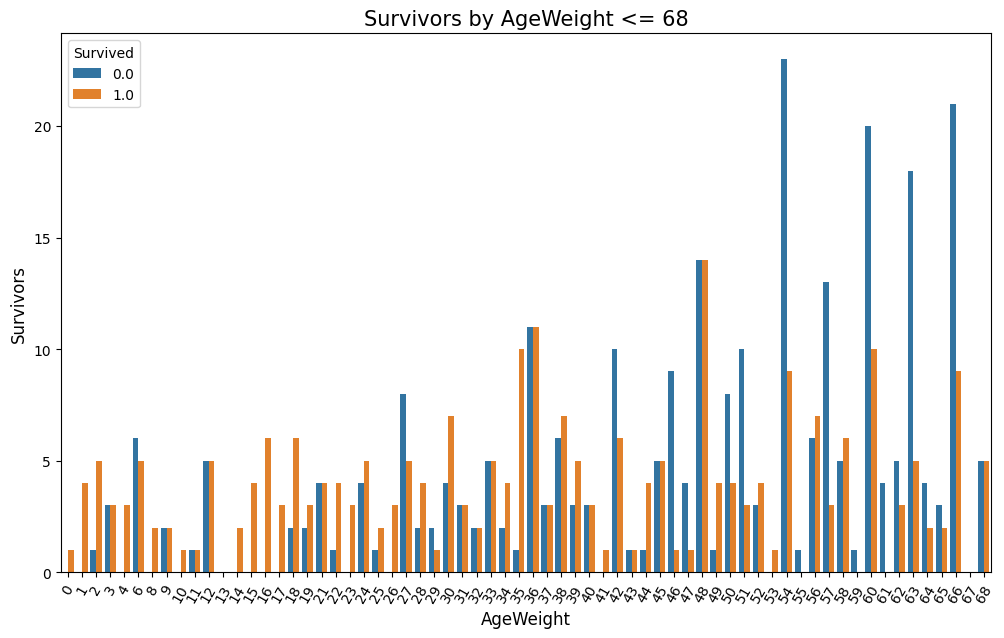

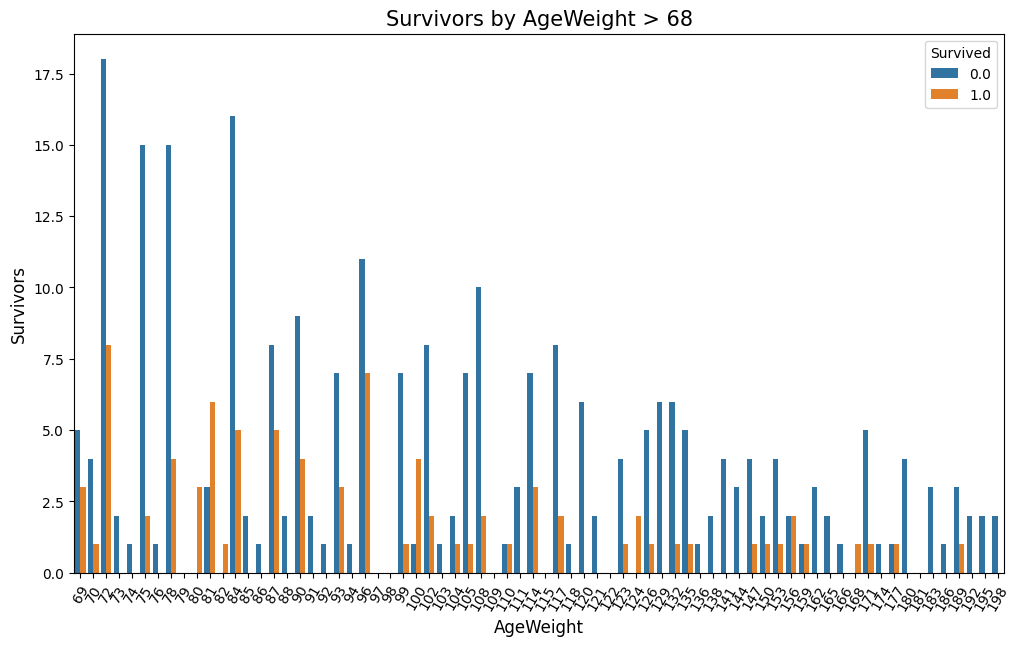

In [94]:
show_survivors_by_age_fare('AgeWeight')

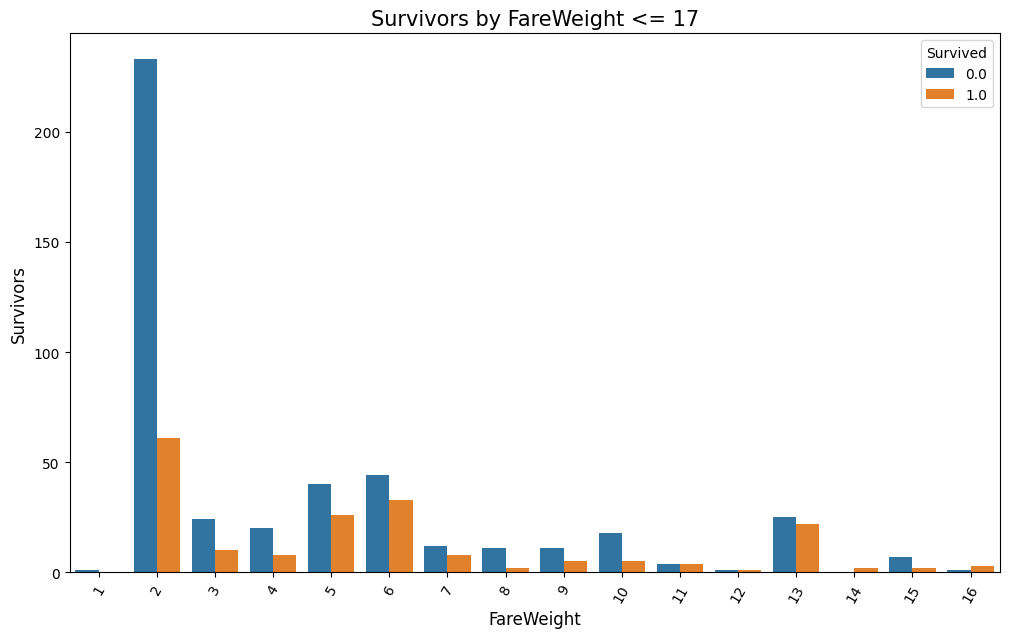

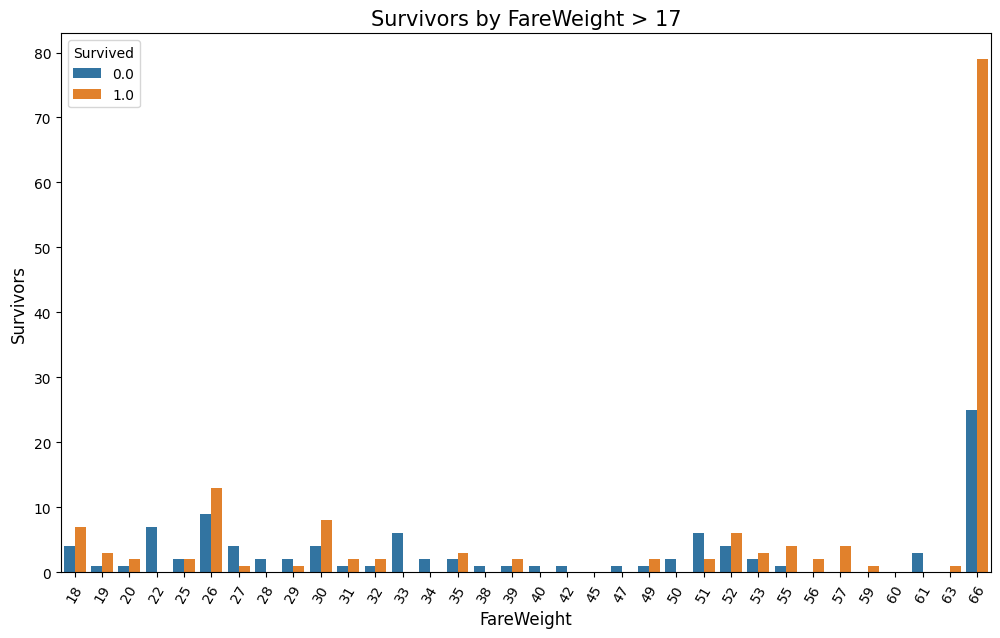

In [95]:
show_survivors_by_age_fare('FareWeight')

---

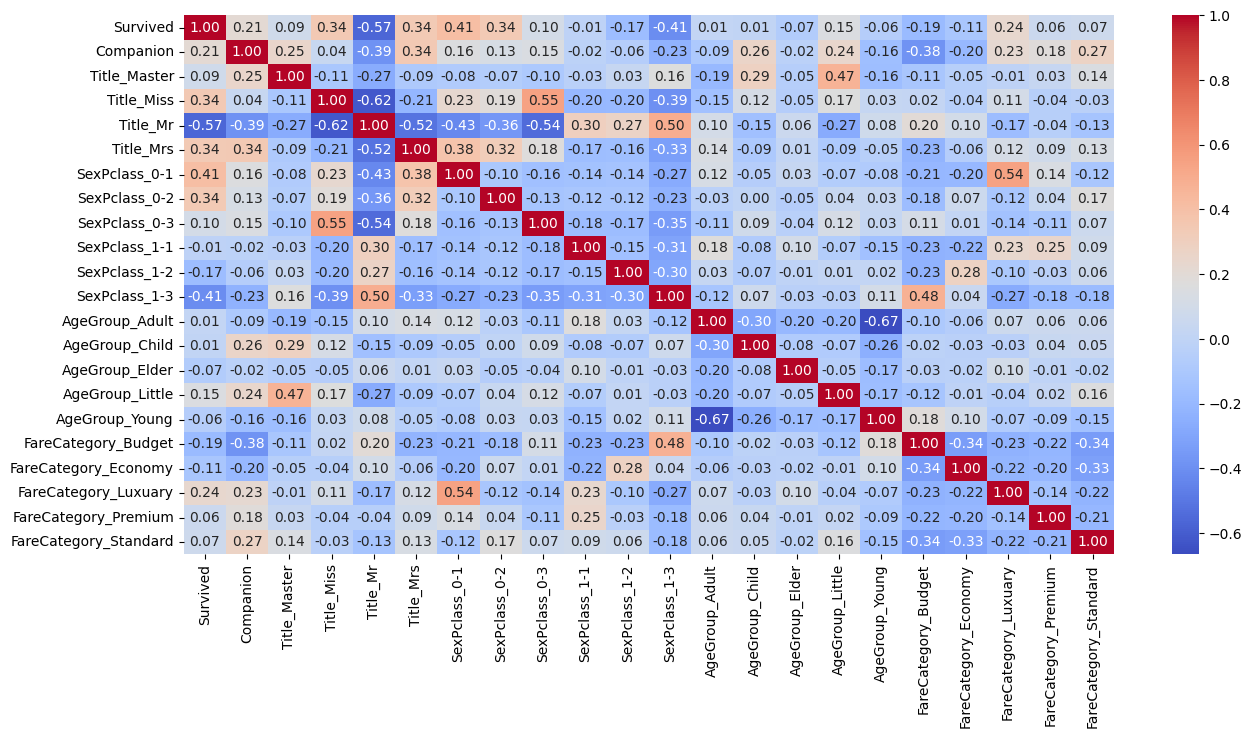

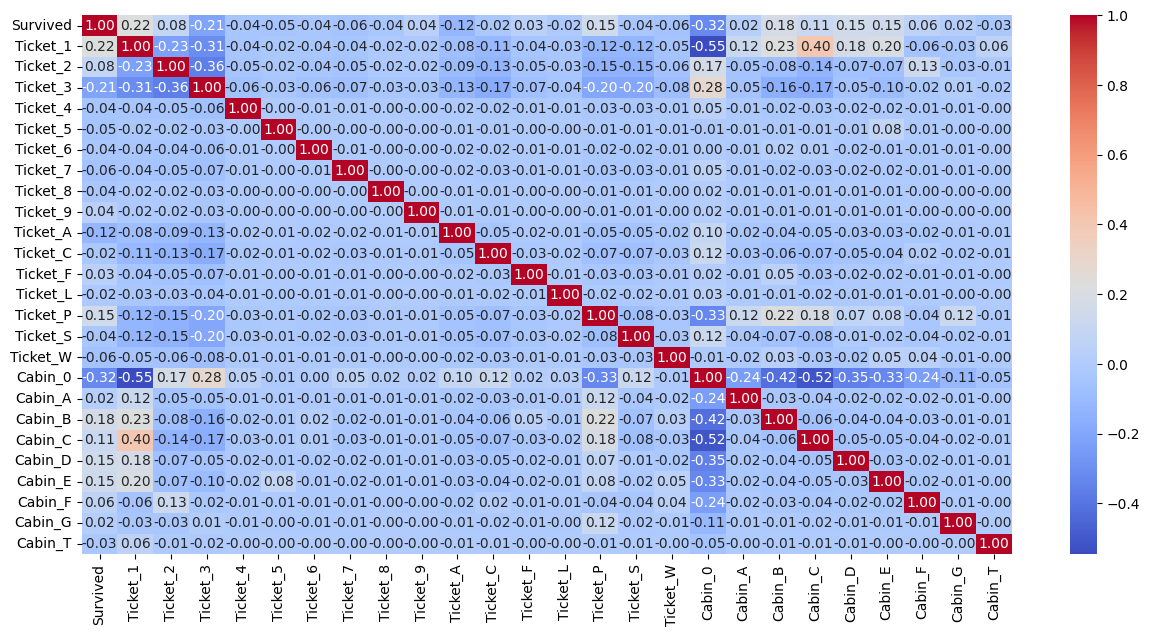

In [100]:
show_corr_matrix(['Survived', 'Title', 'SexPclass', 'Companion', 'AgeGroup', 'FareCategory'])
show_corr_matrix(['Survived', 'Ticket', 'Cabin'])

# 7. Categorical columns to numerical

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    float64
 1   Pclass        1309 non-null   int64  
 2   Title         1309 non-null   object 
 3   Sex           1309 non-null   int64  
 4   Age           1309 non-null   float64
 5   SibSp         1309 non-null   int64  
 6   Parch         1309 non-null   int64  
 7   Ticket        1309 non-null   object 
 8   Fare          1309 non-null   float64
 9   Cabin         1309 non-null   object 
 10  Embarked      1309 non-null   object 
 11  SexPclass     1309 non-null   object 
 12  Companion     1309 non-null   int64  
 13  AgeWeight     1309 non-null   float64
 14  AgeGroup      1309 non-null   object 
 15  FareWeight    1309 non-null   float64
 16  FareCategory  1309 non-null   object 
dtypes: float64(5), int64(5), object(7)
memory usage: 174.0+ KB


In [104]:
ohe = OneHotEncoder(drop='if_binary')
categorical_columns = df.select_dtypes('object').columns.tolist()

In [ ]:
df_ohe = pd.DataFrame(ohe.fit_transform(df[categorical_columns]).toarray(),
                      columns=ohe.get_feature_names_out(categorical_columns))
df_ohe.head()

,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Ticket_1,Ticket_2,Ticket_3,Ticket_4,Ticket_5,Ticket_6,...,AgeGroup_Adult,AgeGroup_Child,AgeGroup_Elder,AgeGroup_Little,AgeGroup_Young,FareCategory_Budget,FareCategory_Economy,FareCategory_Luxuary,FareCategory_Premium,FareCategory_Standard
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [98]:
df_not_encoded = df.drop(columns=categorical_columns).reset_index(drop=True)
df_not_encoded.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Companion,AgeWeight,FareWeight
0,0.0,3,1,22.0,1,0,7.2500,1,66.0,2.416667
1,1.0,1,0,38.0,1,0,66.3438,1,38.0,66.343800
2,1.0,3,0,26.0,0,0,7.9250,0,78.0,2.641667
3,1.0,1,0,35.0,1,0,53.1000,1,35.0,53.100000
4,0.0,3,1,35.0,0,0,8.0500,0,105.0,2.683333


In [99]:
df_2 = pd.concat([df_not_encoded, df_ohe], axis=1)
df_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Companion,AgeWeight,FareWeight,...,AgeGroup_Adult,AgeGroup_Child,AgeGroup_Elder,AgeGroup_Little,AgeGroup_Young,FareCategory_Budget,FareCategory_Economy,FareCategory_Luxuary,FareCategory_Premium,FareCategory_Standard
0,0.0,3,1,22.0,1,0,7.2500,1,66.0,2.416667,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,1.0,1,0,38.0,1,0,66.3438,1,38.0,66.343800,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,3,0,26.0,0,0,7.9250,0,78.0,2.641667,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1,0,35.0,1,0,53.1000,1,35.0,53.100000,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,3,1,35.0,0,0,8.0500,0,105.0,2.683333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# 8. Exporting dfs

In [100]:
index_test_df = train_df.tail(1).index[0] + 1
df_2.iloc[index_test_df-2:index_test_df+2]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Companion,AgeWeight,FareWeight,...,AgeGroup_Adult,AgeGroup_Child,AgeGroup_Elder,AgeGroup_Little,AgeGroup_Young,FareCategory_Budget,FareCategory_Economy,FareCategory_Luxuary,FareCategory_Premium,FareCategory_Standard
889,1.0,1,1,26.0,0,0,30.0000,0,26.0,30.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
890,0.0,3,1,32.0,0,0,7.7500,0,96.0,2.583333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
891,NaN,3,1,34.5,0,0,7.8292,0,103.5,2.609733,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
892,NaN,3,0,47.0,1,0,7.0000,1,141.0,2.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [101]:
df_2.iloc[:index_test_df].to_csv('data/preprocessed_train.csv', index=False)
df_2.iloc[index_test_df:].to_csv('data/preprocessed_test.csv', index=False)